In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dus14 = pd.read_csv("DUS2014.csv")
dus18 = pd.read_csv("DUS2018.csv")

In [3]:
d14s = dus14 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]] #susikuriam mazesne lentele

In [4]:
d18s = dus18 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]]

In [23]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.


vyru14 = d14s[d14s["lytis"]=="M"]  
vyruvid14 = vyru14["bdu_spalio"].mean()
mot14 = d14s[d14s["lytis"]=="F"]  
moteruvid14 = mot14["bdu_spalio"].mean()

print("2014 vyru:" , vyruvid14/3.4528 ,"," ,  "2014 moteru:" ,moteruvid14/3.4528 )        #nes Litai

vyru18 = d18s[d18s["lytis"]=="M"]  
vyruvid18 = vyru18["bdu_spalio"].mean()
mot18 = d18s[d18s["lytis"]=="F"]  
moteruvid18 = mot18["bdu_spalio"].mean()

print("2018 vyru:" , vyruvid18 ,"," ,  "2018 moteru:" ,moteruvid18 )


2014 vyru: 762.7704309291468 , 2014 moteru: 607.4431355450901
2018 vyru: 1014.4962626801922 , 2018 moteru: 832.1469450889405


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
bdu_spalio = d14s["bdu_spalio"].values
bdu_eurais = bdu_spalio/3.4528
d14s["bdu€"] = bdu_eurais
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [25]:
d14s["bdu€"] = d14s["bdu_spalio"]/ 3.4528

In [26]:
# .query()

d14s.query('lytis =="M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [27]:
d14s.query("lytis =='M' and issilavinimas =='G3'")

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [30]:
edu = input("Iveskite issilavinima koda(G1, G2 , G3 , G4)")
ats = d14s.query("issilavinimas == @edu")             #  @ pries tai esanciame kode!!!!!!!!!!!!!!!!!!!!  
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
1,F,20-29,G2,6.00,334,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720


In [70]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']

# g1_issilavinimas = d14s.query("issilavinimas == 'G1'")
for kodas in edus:
    vidurkis = d14s.query("issilavinimas ==@kodas")["bdu€"].mean()
    print(kodas, vidurkis)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [37]:
def ltlToEuro(litas):
    euras = litas / 3.4528
    return euras

d14s["Eurai is funkcijos"] = d14s["bdu_spalio"].apply(ltlToEuro)                #d14s["Eurai is funkcijos"] = "taip idedam i funkcija"


In [38]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [45]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė



def LTlytis(lytis):
    if lytis == "M":
        return "Vyras"
    else:
        return "Moteris"

d14s["Lytis Lietuviskai"] = d14s["lytis"].apply(LTlytis)  
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras


In [ ]:
#alternatyvus sprendimas: 
def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys
zodzioKeitimas()
d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

In [47]:
d14s.drop(columns=["Eurai is funkcijos"], inplace = True)        #istrinti stulpeli
d14s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,Vyras


In [52]:
nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = ["OCCUR_DATE" , "OCCUR_TIME"])
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [53]:
nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = {"DATA":["OCCUR_DATE" , "OCCUR_TIME"]})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [55]:
# .dt modulis ,veikia tik tada ,jei stulpelis DataFrame yra date time tipo 

nypd_small = nypd[["DATA" , "BORO", 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [56]:
nypd_small ["DATA"].dt.month

0         8
1        11
2         2
3        10
4         8
         ..
21621    11
21622    12
21623     7
21624     9
21625     4
Name: DATA, Length: 21626, dtype: int32

In [57]:
nypd_small ["MonthNumber"] = nypd_small["DATA"].dt.month
nypd_small ["Hour"] = nypd_small.
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber
0,2019-08-23 22:10:00,QUEENS,False,8
1,2019-11-27 15:54:00,BRONX,False,11
2,2019-02-02 19:40:00,MANHATTAN,False,2


In [58]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February


In [66]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr


def Parosmetas(Hour):
    if 12 <= Hour < 18:
        return "Diena"
    elif  6 <= Hour < 12:
        return "Rytas "
    else: 
        return "Naktis"

nypd_small['Paros laikas'] = nypd_small["Hour"].apply(Parosmetas)  
nypd_small.head(6)

#kita

def MetuLaikas(x):
    if x>= 12 or x <=2:                                   #galima ir     if x in [12,1,2]:
        return "Ziema"
    elif x >= 3 and x <=5:
        return "Pavasaris "    
    elif x >= 6 and x <=8:
        return "Vasara "   
    else:
        return "Ruduo"  

nypd_small['Metu laikas'] = nypd_small["MonthNr"].apply(MetuLaikas)  
nypd_small.head(6)




,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName,Paros laikas,Matu laikas,Metu laikas
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August,Naktis,Vasara,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November,Diena,Ruduo,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February,Naktis,Ziema,Ziema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,10,0,1,October,Naktis,Ruduo,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,8,18,18,August,Naktis,Vasara,Vasara
5,2019-06-07 17:50:00,BROOKLYN,False,6,6,17,18,June,Diena,Vasara,Vasara


In [67]:
nypd_small.drop(columns=["Matu laikas"], inplace = True)        #istrinti stulpeli
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName,Paros laikas,Metu laikas
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February,Naktis,Ziema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,8,18,18,August,Naktis,Vasara


In [71]:
nypd_small["MthName"].value_counts().sort_values(ascending=False)                  #suskaiciuoja visus iraso pasirinkimus
                                                        # MTH Name siuo atveju index, o skaiciai Value

MthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [72]:
nypd_small["MthName"].value_counts().sort_values(ascending=True)      #filtras is eiles nuo maziausios value

MthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [73]:
nypd_small["MthName"].value_counts().sort_index(ascending=True)            #filtras is eiles nuo maziausio index

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [74]:
shootings = nypd_small["MthName"].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts , sep="\n")

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [75]:
nypd_small["MonthNr"].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

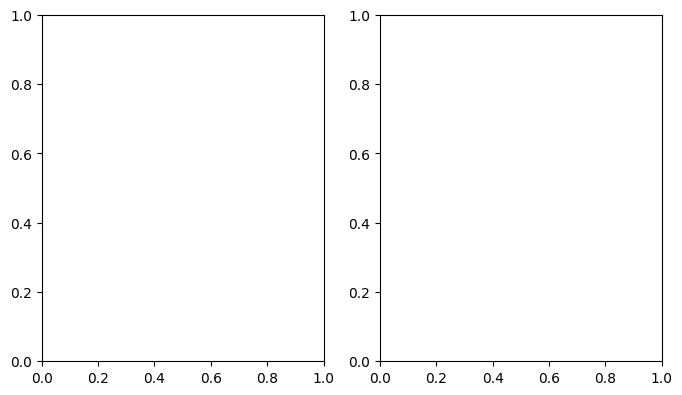

In [80]:
#plt.subplots():
langas , grafikas = plt.subplots(1,2, figsize=[8,4.5])          # plt.subplotsx(y,x) = x viena eiltue, y= stulpelis

plt.show()

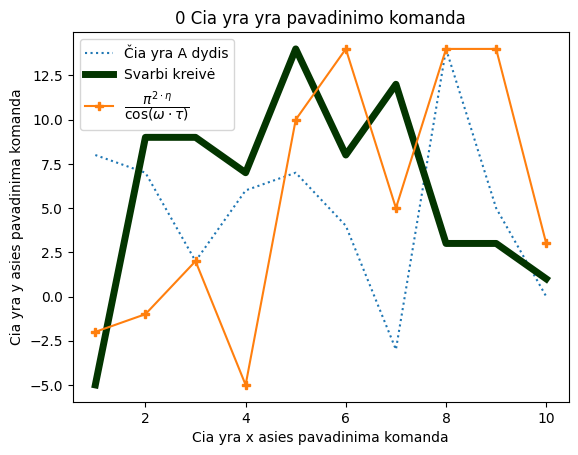

In [101]:
a = np.arange(1,11)
b= np.random.randint (-5,15,10)   
c = np.random.randint (-5,15,10)
d = np.random.randint (-5,15,10)

#plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis" , linestyle = ":")
grafikas.plot(a,c, label="Svarbi kreivė" , linewidth = "5", color = "xkcd:dark green")
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$' , marker="P")    #marker duomenu taskai

grafikas.set_xlabel("Cia yra x asies pavadinima komanda")
grafikas.set_ylabel("Cia yra y asies pavadinima komanda")
grafikas.set_title("0 Cia yra yra pavadinimo komanda")

grafikas.legend(loc='best' )         #loc=[1,1] ,'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

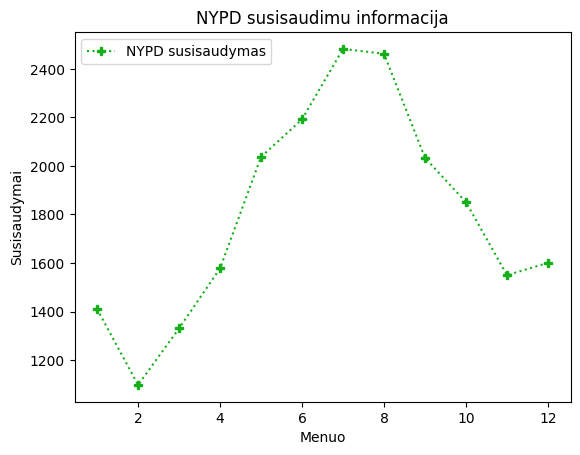

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

In [124]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus
# 
months = nypd_small["MonthNr"].value_counts().sort_index(ascending=True).index
shootings = nypd_small["MonthNr"].value_counts().sort_index(ascending=True).values

langas , grafikas = plt.subplots()

grafikas.plot(months , shootings  , label= "NYPD susisaudymas" , linestyle = ":" ,marker="P", color = "xkcd:green")

grafikas.set_xlabel("Menuo")
grafikas.set_ylabel("Susisaudymai")
grafikas.set_title("NYPD susisaudimu informacija")

grafikas.legend(loc='best' )
plt.show()

nypd_small["MonthNr"].value_counts().sort_index(ascending=True)

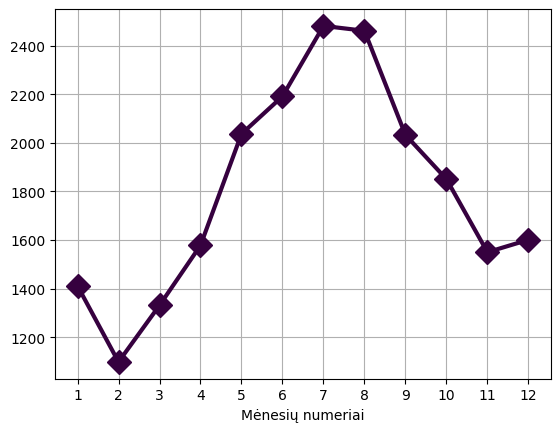

In [140]:
monts_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = monts_counts.index
counts = monts_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x ašies norimų skaičių palikimas
# ax.set_xlim(-5, 15) #x ašies ribų keitimas
ax.grid() #tinklelio uždėjimas
ax.set_xlabel('Mėnesių numeriai')

plt.show()

In [151]:
nypd_small[['MthName', 'MonthNr']].value_counts().reset_index()

,MthName,MonthNr,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


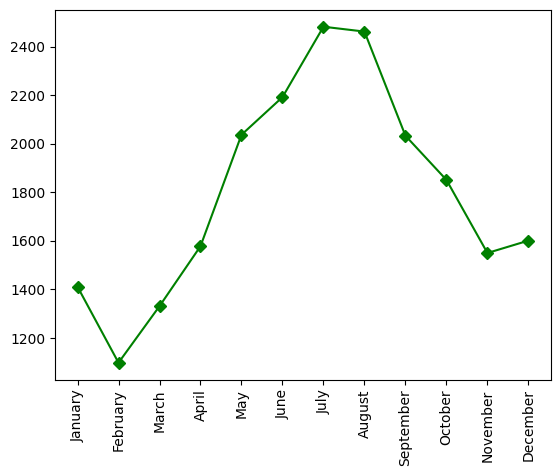

In [150]:
#Sensejus parode

months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months["count"].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

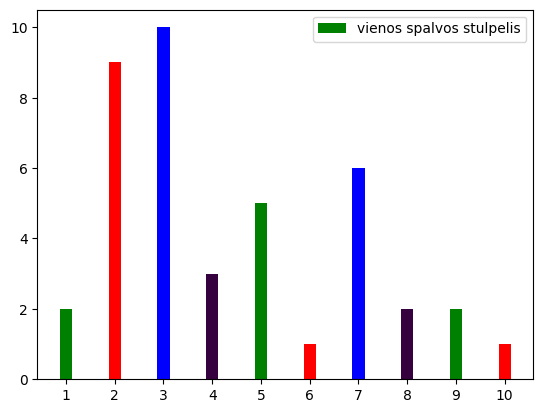

In [155]:
# bar grafikai:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list = ["green", "red", "blue", "xkcd:deep purple"]

fig, ax = plt.subplots()

ax.bar(a, b ,color= color_list, width = 0.25 ,label = "vienos spalvos stulpelis")
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()

In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\ITWORK\Desktop\Python\JupyterNotebooks


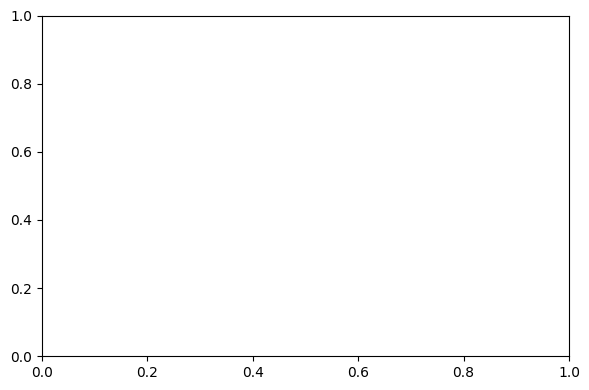

In [4]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

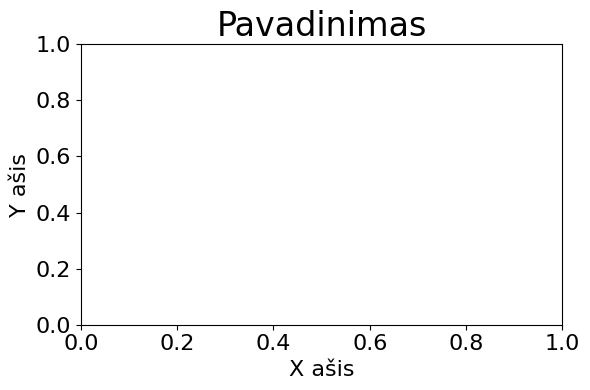

In [5]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo

In [57]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles

# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite
dus14 = pd.read_csv("DUS2014.csv")
dus18 = pd.read_csv("DUS2018.csv")


d14s = dus14[["lytis" , "amzius" , "bdu_spalio" , "issilavinimas", "profesija"]]
d14s.head(2)
d18s = dus18[["lytis" , "amzius" , "bdu_spalio" , "issilavinimas", "profesija"]]
d18s.head(10)


,lytis,amzius,bdu_spalio,issilavinimas,profesija
0,F,40-49,460,G2,334
1,M,50-59,1487,G2,722
2,M,40-49,1500,G2,721
3,M,50-59,1500,G2,722
4,F,40-49,400,G2,522
5,F,40-49,400,G2,522
6,F,14-29,400,G2,522
7,M,50-59,400,G2,522
8,F,50-59,400,G2,522
9,F,30-39,400,G2,522


In [24]:
moterys_2014 = d14s[d14s["lytis"]=="F"] 
vyrai_2014 = d14s[d14s["lytis"]=="M"] 
moteru_sk_2014 = moterys_2014['lytis'].value_counts().values[0] 
vyru_sk_2014 = vyrai_2014['lytis'].value_counts().values[0]

moterys_2018 = d18s[d18s["lytis"]=="F"] 
vyrai_2018 = d18s[d18s["lytis"]=="M"]
moteru_sk_2018 = moterys_2018['lytis'].value_counts().values[0]
vyru_sk_2018 = vyrai_2018['lytis'].value_counts().values[0]

moteru_sk_pokytis = moteru_sk_2018-moteru_sk_2014
vyru_sk_pokytis = vyru_sk_2018-vyru_sk_2014

print(moteru_sk_pokytis ,vyru_sk_pokytis ,sep= "\n" )




-1678
-110


In [21]:
moterys_2014["lytis"].value_counts().values

array([22366], dtype=int64)

In [48]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?

respondetu_sk_2018 = d18s["lytis"].value_counts().sort_values(ascending=False)  
print("respondentų iš kiekvienos amžiaus grupės" ,respondetu_sk_2018)

print("\n" )

# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

amziaus_gr = d18s["amzius"].value_counts().index           #cia yra amziaus grupes 14-29,30-39,40-49,50-59)
for amzius in amziaus_gr:
    amziaus_grupes_lentele = d18s.query("amzius ==@amzius")
    vidutinis_atlyginimas = amziaus_grupes_lentele["bdu_spalio"].mean()
    print("Amzius:" ,amzius, "Vidutinis atlyginimas" ,vidutinis_atlyginimas)




respondentų iš kiekvienos amžiaus grupės lytis
M    22476
F    20688
Name: count, dtype: int64


Amzius: 50-59 Vidutinis atlyginimas 856.0671241050119
Amzius: 40-49 Vidutinis atlyginimas 980.8554293599406
Amzius: 14-29 Vidutinis atlyginimas 865.5633005977796
Amzius: 30-39 Vidutinis atlyginimas 1088.9557207498383
Amzius: 60+ Vidutinis atlyginimas 784.542386341076


In [62]:
# Suraskite vidutinius atlyginimuspagal issilavinimas (2018 metams)



Issilavinimo_Gr = d18s["issilavinimas"].value_counts().sort_index(ascending=True).index
# Issilavinimo_Gr = d18s["issilavinimas"].value_counts().index       Ten sort panaudojom,kad is eiles rasytu 
print(Issilavinimo_Gr)
for grupe in Issilavinimo_Gr :
    Issilavinimo_GR_lentele = d18s.query("issilavinimas ==@grupe")
    vidutinis_atlyginimas_Issilavinimo = Issilavinimo_GR_lentele["bdu_spalio"].mean()
    print("Issilavinimo grupe:" ,grupe, "Vidutinis atlyginimas" ,vidutinis_atlyginimas_Issilavinimo)


Index(['G1', 'G2', 'G3', 'G4'], dtype='object', name='issilavinimas')
Issilavinimo grupe: G1 Vidutinis atlyginimas 626.3916786226686
Issilavinimo grupe: G2 Vidutinis atlyginimas 732.6871572212066
Issilavinimo grupe: G3 Vidutinis atlyginimas 1094.7640256572408
Issilavinimo grupe: G4 Vidutinis atlyginimas 1246.4511960095226


In [64]:
# Palyginkite, kiek procentais daugiau uždirbo vyrai už moteris 2018 metais?
# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis?
# imkite bdu_spalio

vyrai_2018 = d18s[d18s["lytis"]=="M"]
vyruvid18 = vyrai_2018["bdu_spalio"].mean()
moterys_2018 = d18s[d18s["lytis"]=="F"]  
moteruvid18 = moterys_2018["bdu_spalio"].mean()
vidutinis_atlyginimas = d18s["bdu_spalio"].mean()

print("Vidutinis atlyginimas" , vidutinis_atlyginimas)
print("moteruvid18" , moteruvid18)
print("vyruvid18" ,  vyruvid18)
print("\n" )

vyraidaugiau_procentais = (moteruvid18 *100 / vyruvid18 -100)* -1
print(vyraidaugiau_procentais , ":procentais daugiau uždirbo vyrai už moteris 2018 metais" )

moterysmaziau_procentaisuzvyrus = vyruvid18  *100 / vidutinis_atlyginimas -100
print(moterysmaziau_procentaisuzvyrus , ":procentais daugiau uždirbo vyrai už  2018 metu vidurki" )

moterysmaziau_procentais = (moteruvid18  *100 / vidutinis_atlyginimas -100)*-1
print(moterysmaziau_procentais , ":procentais daugiau uždirbo mo už  2018 metu vidurki" )


Vidutinis atlyginimas 927.0983690112131
moteruvid18 832.1469450889405
vyruvid18 1014.4962626801922


17.974370561948064 :procentais daugiau uždirbo vyrai už moteris 2018 metais
9.427035640478195 :procentais daugiau uždirbo vyrai už  2018 metu vidurki
10.241785240496341 :procentais daugiau uždirbo vyrai už  2018 metu vidurki


In [95]:
# Nuskaitykite aruodas.csv failą
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.

aruod = pd.read_csv("aruodas.csv")
aruod.head(5)

def Floatinisreikalas(kvadratai):
    kvadratokaina = float(kvadratai.split("€")[0])
    return kvadratokaina

aruod['KainaS'] = aruod["€/S"].apply(Floatinisreikalas)  
vidutine_kaina = aruod['KainaS'].mean()
aruod.head(6)




,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0
5,5,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Tvankstos g.",194 500 €,3536€/m²,1/4,55.00,3,3536.0


In [96]:
vidutine_kaina = aruod['KainaS'].mean()
print(vidutine_kaina)
Nvidkaina = np.mean(aruod["KainaS"])          #kitas ubdas naudojant numpy
print(Nvidkaina)


3301.46678555506
3301.46678555506


In [113]:
#Dar su aruodas.csv:
# Suraskite, kiek buvo pigių, kiek buvo brangių butų (mažiau už vidutinę kainą, daugiau nei vidutinė kaina)
#Suraskite vidutinį butų plotą.

pigus = []
brangus = []

for skaicius in aruod['KainaS']: 
    if skaicius > vidutine_kaina :
        brangus.append(skaicius)
        brangiubutuskaicius = len(brangus)
    else:
        pigus.append(skaicius)
        pigiubutuskaicius = len(pigus)

print("pigus butai:" ,pigiubutuskaicius)
print("brangus butai:" , brangiubutuskaicius)

vidutinis_plotas = aruod['Plotas'].mean()
print("Vidutinis plotas" ,vidutinis_plotas)

pigus butai: 1283
brangus butai: 960
Vidutinis plotas 60.41541685242979


In [ ]:
# Remigijaus Aruodas:
#Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
f = '3690€/m²' # formule keicianti is str i float
def vertimas(el):
    elF = float(el[:-4])
    return elF
ats = vertimas(f)
print(ats)
aruod['KainaS'] = aruod['€/S'].apply(vertimas) # pritaikymas anksciau parasytos formules
aruod.head(5)
#  Suraskite vidutinę kv. m. kainą.
VidKaina = aruod['KainaS'].mean()
print(VidKaina)
NVidKaina = np.mean(aruod['KainaS'])
print(NVidKaina)

In [88]:
autopliusSmaller.head(5)

,rida,gamintojas,price
0,253 000 km,BMW,19 500
1,195 405 km,Mitsubishi,2 700
2,129 800 km,Seat,13 490
3,183 000 km,Skoda,14 650
4,127 896 km,Volvo,38 000


Vidutine kaina 8831.85375
Kokia kaina
pigūs         1477
brangūs        584
vidutiniai     339
Name: count, dtype: int64


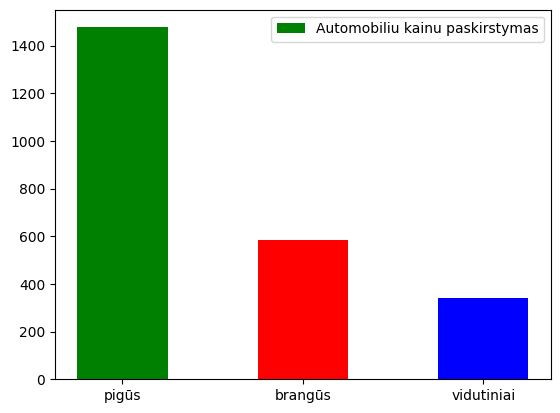

In [164]:
#AUTO.CSV failas:
#Raskite vidutinę kainą, ridą visiems automobiliams bei atskirai šiems: BMW, Audi, Toyota, Vokswagen, Ford.
#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?
#tai vizualizuokite su bar 


autoplius= pd.read_csv("auto.csv", sep= "|") 

autopliusSmaller = autoplius [["rida" , "gamintojas" , "price"]] #susikuriam mazesne lentele
def Floatinisreikalas_kainai(konvertuojam):
    konvertacijakainos = float(konvertuojam.replace(" ",""))
    return konvertacijakainos

autopliusSmaller["Kaina"] = autopliusSmaller["price"].apply(Floatinisreikalas_kainai)
autopliusSmaller.head(5)

vidutine_kaina = autopliusSmaller['Kaina'].mean()
print("Vidutine kaina" , vidutine_kaina)

def Floatinisreikalas_ridai(konvertuojam):
    if "nenur" in konvertuojam.lower():
        return 0
    else:
        konvertacijaridos = float(konvertuojam.replace(" ","")[:-2]) 
        return konvertacijaridos

autopliusSmaller["Rida"] = autopliusSmaller["rida"].apply(Floatinisreikalas_ridai)
autopliusSmaller.head(5)

def Kainuskirstymas(money):
    pavadinam = ""                
    if money <=0.75*vidutine_kaina:
        pavadinam = "pigūs"                                     # cia pakeiciam pavadinam reiksme, suteikiam nauja
    elif money >=1.15*vidutine_kaina:
        pavadinam = "brangūs"
    else:
        pavadinam = "vidutiniai"
    return pavadinam

autopliusSmaller["Kokia kaina"] = autopliusSmaller["Kaina"].apply(Kainuskirstymas)

suskirstymas_pagal_kainas = autopliusSmaller["Kokia kaina"].value_counts()
print(suskirstymas_pagal_kainas)


a = suskirstymas_pagal_kainas.index
b =suskirstymas_pagal_kainas.values
color_list = ["green", "red", "blue"]
fig, ax = plt.subplots()

ax.bar(a, b ,color= color_list, width = 0.5 ,label = "Automobiliu kainu paskirstymas")
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()


In [141]:
import warnings
warnings.filterwarnings('ignore')

In [186]:

#Su Dar su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai


#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
# Toliau naudojama tik naujoji lentelė

LifeExp= pd.read_csv("life-exp.csv") 
naujoji_lentele2019 = LifeExp.query('Year == 2019')

# Suraskite vidutinę gyvenimo trukmę
vid_gyv_trukme = naujoji_lentele2019["Life expectancy"].mean()
print("vid_gyv_trukme:", vid_gyv_trukme)

# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?
#  .query() duomenų filtravimas ir atrinkimas

def gyvenimo_trukme(amzius):
    if amzius > vid_gyv_trukme:
        return "ilgaamžis"
    else: return "neilgaamžis"

naujoji_lentele2019["Gyvenimo trukme"] = naujoji_lentele2019["Life expectancy"].apply(gyvenimo_trukme)
suskirstymas_pagal_metus = naujoji_lentele2019["Gyvenimo trukme"].value_counts()
print(suskirstymas_pagal_metus)
naujoji_lentele2019.head(5)

# naujoji_lentele2019.query("lytis =='neilgaamžis' and issilavinimas =='ilgaamžis'").value_counts()




vid_gyv_trukme: 73.83298925497944
Gyvenimo trukme
ilgaamžis      138
neilgaamžis    105
Name: count, dtype: int64


,Entity,Code,Year,Life expectancy,Gyvenimo trukme
15552,Afghanistan,AFG,2019,64.833,neilgaamžis
15553,Africa,NaN,2019,63.170,neilgaamžis
15554,Albania,ALB,2019,78.573,ilgaamžis
15555,Algeria,DZA,2019,76.880,ilgaamžis
15556,American Samoa,ASM,2019,73.745,neilgaamžis


In [174]:
# Su life-exp.csv:
life=pd.read_csv('life-exp.csv')
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
life_new = life.query('Year == 2019')
life_new.head(5)
# Toliau naudojama tik naujoji lentelė
# Suraskite vidutinę gyvenimo trukmę
vid_gyv_trukmė = life_new['Life expectancy'].mean()
print('vidutinė gyvenimo trukmė', vid_gyv_trukmė)
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?
#  .query() duomenų filtravimas ir atrinkimas
def gyv_trukme(amzius):
    if amzius > vid_gyv_trukmė:
        return "ilgaamžis"
    else: return "neilgaamžis"
life_new['Ilgaamžiškumas'] = life_new['Life expectancy'].apply(gyv_trukme)    
ilgaam = life_new[life_new['Life expectancy'] > vid_gyv_trukmė]['Life expectancy'].count()
neilgaam = life_new[life_new['Life expectancy'] < vid_gyv_trukmė]['Life expectancy'].count()
print('Ilgaamžių valstybių kiekis', ilgaam)
print('Neilgaamžių valstybių kiekis', neilgaam)
ilg = life_new["Ilgaamžiškumas"].value_counts()
print(ilg)

vidutinė gyvenimo trukmė 73.83298925497944
Ilgaamžių valstybių kiekis 138
Neilgaamžių valstybių kiekis 105
Ilgaamžiškumas
ilgaamžis      138
neilgaamžis    105
Name: count, dtype: int64
